In [1]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *
import os
from numpy.lib.recfunctions import append_fields
import scipy.stats

import matplotlib.pyplot as plt
import numpy as np
from run_systematics import sys_iteration, weightmultiply, fitting_allSP, calling_sysMap

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


[1.8435758024855728]
[24.111351509626704]


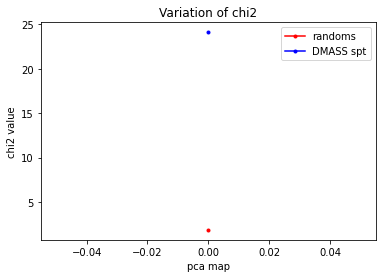

In [2]:
file_path = '/users/PCON0003/warner785/DMASSY3/code_py3/'

with open(file_path + 'chi2_randoms_spt.txt') as randoms:
#    w  = [float(x) for x in next(randoms).split()]
    chi2_randoms = [float(x) for x in randoms]
randoms.close()

with open(file_path + 'chi2_dmassi_spt.txt') as dmass:
#    w  = [float(x) for x in next(dmass).split()]
    chi2_dmass = [float(x) for x in dmass]
dmass.close()

#with open(file_path + 'chi2_dmassf_pca_FIRST_50.txt') as dmassi:
#    chi2_dmassi = [float(x) for x in dmassi]
#dmassi.close()

#with open(file_path + 'chi2_dmassf_pca50.txt') as dmasschi:
#    chi2_dmass_chi = [float(x) for x in dmasschi]
#dmasschi.close()
    
print(chi2_randoms)
print(chi2_dmass)

import matplotlib.pyplot as plt

plt.plot(chi2_randoms, color='red', marker='.', label='randoms')
plt.plot(chi2_dmass, color='blue', marker='.', label='DMASS spt')
#plt.plot(chi2_dmassi, marker='.', label='ALL pca50')
#plt.plot(chi2_dmass_chi, marker='.', label='chi2>2 pca107')
plt.legend()
plt.ylabel('chi2 value') 
plt.xlabel('pca map')
plt.title("Variation of chi2") 
plt.show()

In [6]:
for x in range(len(chi2_dmass)):
    if chi2_dmass[x]>1:
        print(x, chi2_dmass[x]) 
#    y_new = y[x]+1
#y.append(y_new)

0 1.1403345326622942
8 1.0089250128889524
9 1.160670943637774
10 1.788115345109454
23 1.0269284752231027
40 1.0081937420210825
48 1.2725817475703447


In [2]:
keyword_template = 'pca{0}_'

#First set:
dmass_chron = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/'+'pca0_dmass_sys_weight_val2.fits')
norm_weight1 = 1
#norm_weight1 = np.mean(dmass_chron['SYS_WEIGHT'][dmass_chron['SYS_WEIGHT']!=0])
dmass_chron_i = dmass_chron/norm_weight1
#print(dmass_chron_i)
#y = [50]
#dmass_i = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/dmass_sys_weight_pca.fits')
#dmass_chron_i = dmass_i['SYS_WEIGHT']
#print(dmass_chron_i.size)
for x in range(107): #50, 56
    if x!=0:
    #if chi2_dmass[x]>1 and x!=0:
#        print(y[x])
        input_keyword = keyword_template.format(x) #y[x]
        print(input_keyword)
        dmass_chron = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/'+input_keyword+'dmass_sys_weight_val2.fits')
        norm_weight = 1
        #norm_weight = np.mean(dmass_chron['SYS_WEIGHT'][dmass_chron['SYS_WEIGHT']!=0])
        norm_dmass = (dmass_chron/norm_weight)
        full_dmass_sysweights = np.multiply(norm_dmass,dmass_chron_i)
        dmass_chron_i = full_dmass_sysweights
        #print(dmass_chron_i)
#    y_new = y[x]+1
#    y.append(y_new)

pca1_
pca2_
pca3_
pca4_
pca5_
pca6_
pca7_
pca8_
pca9_
pca10_
pca11_
pca12_
pca13_
pca14_
pca15_
pca16_
pca17_
pca18_
pca19_
pca20_
pca21_
pca22_
pca23_
pca24_
pca25_
pca26_
pca27_
pca28_
pca29_
pca30_
pca31_
pca32_
pca33_
pca34_
pca35_
pca36_
pca37_
pca38_
pca39_
pca40_
pca41_
pca42_
pca43_
pca44_
pca45_
pca46_
pca47_
pca48_
pca49_
pca50_
pca51_
pca52_
pca53_
pca54_
pca55_
pca56_
pca57_
pca58_
pca59_
pca60_
pca61_
pca62_
pca63_
pca64_
pca65_
pca66_
pca67_
pca68_
pca69_
pca70_
pca71_
pca72_
pca73_
pca74_
pca75_
pca76_
pca77_
pca78_
pca79_
pca80_
pca81_
pca82_
pca83_
pca84_
pca85_
pca86_
pca87_
pca88_
pca89_
pca90_
pca91_
pca92_
pca93_
pca94_
pca95_
pca96_
pca97_
pca98_
pca99_
pca100_
pca101_
pca102_
pca103_
pca104_
pca105_
pca106_


In [24]:
dmass_chron = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/'+'pc0_'+'dmass_sys_weight_spt.fits')
norm_weight1 = 1
norm_weight2 = np.mean(dmass_chron['SYS_WEIGHT'][dmass_chron['SYS_WEIGHT']!=0])
dmass_chron_i = dmass_chron['SYS_WEIGHT']/norm_weight1
print(dmass_chron_i)

[0.         0.         0.         ... 0.99843997 0.         0.99674307]


In [16]:
print(dmass_chron[dmass_chron['SYS_WEIGHT']!=0].size)

6129753


In [3]:
print(full_dmass_sysweights)

#fig, ax = plt.subplots()
#ax.hist(full_dmass_sysweights[full_dmass_sysweights!=0])

#dmass_chron['SYS_WEIGHT'] = full_dmass_sysweights
outdir = '/fs/scratch/PCON0008/warner785/bwarner/'
os.makedirs(outdir, exist_ok=True)
esutil.io.write( outdir+'dmass_validation_check107.fits', full_dmass_sysweights, overwrite=True)

[0.         0.         1.23793322 ... 1.27877367 1.01068648 1.00867317]


In [4]:
print(np.mean(full_dmass_sysweights))

0.9776645349878679


In [5]:
print(np.mean(dmass_chron_i[dmass_chron_i!=0]))

1.0001989505976698


In [7]:
print(dmass_chron_i[dmass_chron_i==0].size)

1


(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 8.00000e+00, 1.90000e+01,
        5.70000e+01, 9.40000e+01, 2.09000e+02, 3.74000e+02, 6.19000e+02,
        8.88000e+02, 1.42500e+03, 1.99800e+03, 3.04800e+03, 4.05400e+03,
        5.86000e+03, 8.14900e+03, 1.07500e+04, 1.45720e+04, 2.04430e+04,
        2.85690e+04, 4.04710e+04, 5.90530e+04, 8.17150e+04, 1.09589e+05,
        1.37541e+05, 1.63881e+05, 1.83495e+05, 1.90943e+05, 1.84576e+05,
        1.66230e+05, 1.37572e+05, 1.06615e+05, 7.60180e+04, 5.17760e+04,
        3.32550e+04, 2.09740e+04, 1.28440e+04, 8.16

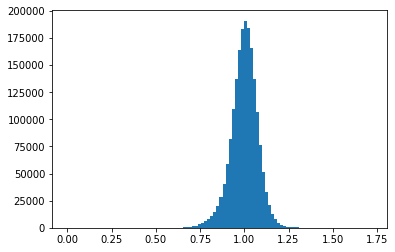

In [8]:
fig, ax = plt.subplots()
ax.hist(full_dmass_sysweights, bins = 100)

In [10]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *
import os
from numpy.lib.recfunctions import append_fields
import scipy.stats

import matplotlib.pyplot as plt
import numpy as np
from run_systematics import sys_iteration, weightmultiply, fitting_allSP, calling_sysMap

#debugging:
#import ipdb
#ipdb.set_trace()

# calling map 
path = '/fs/scratch/PCON0008/warner785/bwarner/'
LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits') #BAO is different measurement, may be different from this analysis
# 'Y1LSSmask_v2_redlimcut_il22_seeil4.0_4096ring.fits'
#GoldMask = callingEliGoldMask()
LSSMask = LSSGoldmask
GoldMask = LSSGoldmask

pixra, pixdec = hp.pix2ang(nside=4096,ipix=GoldMask['PIXEL'],nest=True,lonlat=True)

LSSMask = LSSMask[pixdec >-3.0 ]
#GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_st82 = GoldMask[ pixdec > -3.0 ]
GoldMask_spt = GoldMask[ pixdec < -3.0 ]
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

def calling_lens_catalog(catname=None):

    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
    os.system('mkdir '+catdir)
    dmass = esutil.io.read(catname)
    w_dmass = dmass['CMASS_PROB']
    print ('Calculating DMASS systematic weights...')
    dmass = appendColumn(dmass, name='WEIGHT', value= w_dmass )
#   dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]   # for low probability galaxies
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')
    
    randoms = esutil.io.read('/fs/scratch/PCON0008/warner785/bwarner/random_dmass_y1_public_v1.fits')
#    randoms = esutil.io.read('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_st82_DET200_randoms.fits')
    
#    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
#    os.system('mkdir '+catdir)
#    dmass = esutil.io.read('/n/des/lee.5922/data/dmass_cat/dmass_spt_sys_v3.fits')
    #w_dmass = dmass['CMASS_PROB'] *dmass['WEIGHT0_fwhm_r']*dmass['WEIGHT1_airmass_z']
    #print ('Calculatig DMASS systematic weights...')
    #dmass = appendColumn(dmass, name='WEIGHT', value= w_dmass )
    #dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]
    #esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

#    randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

    print ('Resulting catalog size')
    print ('DMASS=', np.sum(dmass['WEIGHT']) )
    print ('randoms=', randoms.size)
    return dmass, randoms

def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0008/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des
    
def ra_dec_to_xyz(ra, dec):
    """Convert ra & dec to Euclidean points
    Parameters
    ----------
    ra, dec : ndarrays
    Returns
    x, y, z : ndarrays
    """
    sin_ra = np.sin(ra * np.pi / 180.)
    cos_ra = np.cos(ra * np.pi / 180.)

    sin_dec = np.sin(np.pi / 2 - dec * np.pi / 180.)
    cos_dec = np.cos(np.pi / 2 - dec * np.pi / 180.)

    return (cos_ra * sin_dec,
            sin_ra * sin_dec,
            cos_dec)

def uniform_sphere(RAlim, DEClim, size=1):
    """Draw a uniform sample on a sphere
    Parameters
    ----------
    RAlim : tuple
        select Right Ascension between RAlim[0] and RAlim[1]
        units are degrees
    DEClim : tuple
        select Declination between DEClim[0] and DEClim[1]
    size : int (optional)
        the size of the random arrays to return (default = 1)
    Returns
    -------
    RA, DEC : ndarray
        the random sample on the sphere within the given limits.
        arrays have shape equal to size.
    """
    zlim = np.sin(np.pi * np.asarray(DEClim) / 180.)

    z = zlim[0] + (zlim[1] - zlim[0]) * np.random.random(size)
    DEC = (180. / np.pi) * np.arcsin(z)
    RA = RAlim[0] + (RAlim[1] - RAlim[0]) * np.random.random(size)
    
    return RA, DEC

def uniform_random_on_sphere(data, size = None ):
    ra = data['RA']
    dec = data['DEC']
    
    n_features = ra.size
    #size = 100 * data.size
    
    # draw a random sample with N points
    ra_R, dec_R = uniform_sphere((min(ra), max(ra)),
                                 (min(dec), max(dec)),
                                 size)
    #data = np.asarray(ra_dec_to_xyz(ra, dec), order='F').T
    #data_R = np.asarray(ra_dec_to_xyz(ra_R, dec_R), order='F').T
    
    #random redshift distribution
    
    data_R = np.zeros((ra_R.size,), dtype=[('RA', 'float'), ('DEC', 'float')])
    data_R['RA'] = ra_R
    data_R['DEC'] = dec_R
                              
    return data_R

## ---------------------------------------------
# 2nd option: set seed -- get same randoms

# import DMASS in validation region
#lens, randoms = calling_lens_catalog('/fs/scratch/PCON0003/warner785/bwarner/dmass_y1_public_v1.fits')

dmass_spt, randoms = calling_lens_catalog('../output/test/train_cat/y3/dmass_spt.fits')
random_spt = uniform_random_on_sphere(dmass_spt, size = 10*int(np.sum(dmass_spt['WEIGHT']))) #larger size of randoms
# applying LSS mask 
random_spt = keepGoodRegion(random_spt)
# DMASS IN TRAINING AND VALIDATION COMBINATION
#dmass_val, randoms = calling_lens_catalog('../output/test/train_cat/y3/dmass_st82_part2.fits')
#dmass_train, randoms = calling_lens_catalog('../output/test/train_cat/y3/dmass_st82_part1.fits')
#esutil.io.write( '../output/test/train_cat/y3/'+'dmass_part1.fits', dmass_train, overwrite=True)
#esutil.io.write( '../output/test/train_cat/y3/'+'dmass_part2.fits', dmass_val, overwrite=True)

#input_path = '../output/test/train_cat/y3/'
#input_keyword = 'dmass_part'
#dmass = io.SearchAndCallFits(path = input_path, keyword = input_keyword)

#random_val = uniform_random_on_sphere(dmass_val, size = 10*int(np.sum(dmass_val['WEIGHT']))) #larger size of randoms
# applying LSS mask 
#random_val = keepGoodRegion(random_val)

plt.rcParams.update({
  "text.usetex": False,
  "font.family": "Helvetica"
})

random_spt = appendColumn(random_spt, value=np.ones(random_spt.size), name='WEIGHT')

path = '/fs/scratch/PCON0008/warner785/bwarner/'
fracDet = fitsio.read(path+'y3a2_griz_o.4096_t.32768_coverfoot_EQU.fits.gz')

phi = random_spt['RA'] * np.pi / 180.0
theta = ( 90.0 - random_spt['DEC'] ) * np.pi/180.0
random_pix = hp.ang2pix(4096, theta, phi)
print(random_pix.size)

frac = np.zeros(hp.nside2npix(4096))
fracDet["PIXEL"] = hp.nest2ring(4096, fracDet['PIXEL'])
#sysHp[sysMap['PIXEL'][dim_mask]] = sysMap['SIGNAL'][dim_mask]
frac[fracDet['PIXEL']] = fracDet['SIGNAL']

frac_obj = frac[random_pix]

u = np.random.rand(len(random_pix))
#select random points with the condition u < frac_obj
random_spt_fracselected = random_spt[u < frac_obj]

def cutPCA(sysMap):
    
    RA, DEC = hp.pix2ang(4096, sysMap['PIXEL'], lonlat=True)
    sysMap = append_fields(sysMap, 'RA', RA, usemask=False)
    sysMap = append_fields(sysMap, 'DEC', DEC, usemask=False)
    #print(sysMap.dtype.names)

    sysMap = keepGoodRegion(sysMap)
    
    # for SPT region
    mask_spt = (sysMap['RA']>295)&(sysMap['RA']<360)|(sysMap['RA']<105)
    mask_spt = mask_spt & (sysMap['DEC']>-68) & (sysMap['DEC']<-10)
    sysMap = sysMap[mask_spt]
    
    # for validation region
#    mask4 =(sysMap['RA']>18)&(sysMap['RA']<43)
#    mask4 = mask4 & (sysMap['DEC']>-10) & (sysMap['DEC']<10)
#    sysMap = sysMap[mask4]
    
    # for training region
#    mask = (sysMap['RA']>310) & (sysMap['RA']<360)|(sysMap['RA']<7)
#    mask = mask & (sysMap['DEC']>-10) & (sysMap['DEC']<10)
#    sysMap = sysMap[mask]
    
    return sysMap


def cut_and_downgradePCA(sysMap):
    #print(sysMap.dtype.names)

    RA, DEC = hp.pix2ang(4096, sysMap['PIXEL'], lonlat=True)
    sysMap = append_fields(sysMap, 'RA', RA, usemask=False)
    sysMap = append_fields(sysMap, 'DEC', DEC, usemask=False)
    #print(sysMap.dtype.names)

    sysMap = keepGoodRegion(sysMap)

    mask4 =(sysMap['RA']>18)&(sysMap['RA']<43)
    mask4 = mask4 & (sysMap['DEC']>-10) & (sysMap['DEC']<10)
    sysMap = sysMap[mask4]
    
    sysHp = np.full(hp.nside2npix(4096), hp.UNSEEN)
    #sysHp[sysMap['PIXEL'][dim_mask]] = sysMap['SIGNAL'][dim_mask]
    sysHp[sysMap['PIXEL']] = sysMap['SIGNAL']
    #print(sysHp.size)
    #print(sysHp[35369:35469])

    #print(sysMap['PIXEL'][dim_mask][0])

    nside_in = hp.pixelfunc.get_nside(sysHp)
    #print(nside_in)
    downgrade = hp.pixelfunc.ud_grade(sysHp, 512, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
    #downgrade128 = hp.pixelfunc.ud_grade(sysHp, 128, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
    #downgrade256 = hp.pixelfunc.ud_grade(sysHp, 256, pess=False, order_in='RING', order_out=None, power=None, dtype=None)

    #default order_out = ring, change to nest? -- check
    nside_out = hp.pixelfunc.get_nside(downgrade)
    #print(nside_out)

    n_good_pixels_at_512 = hp.nside2npix(nside_out)
    #np.zeros(n_good_pixels_at_512, dtype=[('PIXEL','int'), ('SIGNAL','float')] )
    pixels = np.zeros(n_good_pixels_at_512)
    #print(pixels.size)

    #print(hp.visufunc.mollview(sysHp))
    

    #print(sysMap.size)
    
    for x in range(pixels.size):
        if x>0:
            pixels[x]=pixels[x-1]+1
    #print(pixels)

    sysMap = np.zeros( len(pixels), dtype=[('HPIX_512','int'), ('SIGNAL','float'),('RA','float'),('DEC','float')])
    sysMap['HPIX_512'] = pixels
    sysMap['SIGNAL'] = downgrade

    #print(sysMap.size)
    #sysMap = keepGoodRegion(sysMap)
    #print(sysMap.size)

    #restrict to validation region area:
    RA, DEC = hp.pix2ang(512, sysMap['HPIX_512'], lonlat=True)
    #theta, phi = hp.pix2ang(512, sysMap['PIXEL'])
    ##sys_area = np.zeros( len(phi), dtype=[('RA','float'), ('DEC','float')] )

    # Convert silly ra/dec to silly HP angular coordinates.
    ##phi = des['RA'] * np.pi / 180.0
    #RA = phi*(180.0/np.pi)
    #DEC = -(180.0/np.pi)*theta+90.0
    ##theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    sysMap['RA']= RA
    sysMap['DEC'] = DEC
    
    return sysMap

def downgrade_fracDet(fracDet):
    frac = np.zeros(hp.nside2npix(4096))
    fracDet["PIXEL"] = hp.nest2ring(4096, fracDet['PIXEL'])
    #sysHp[sysMap['PIXEL'][dim_mask]] = sysMap['SIGNAL'][dim_mask]
    frac[fracDet['PIXEL']] = fracDet['SIGNAL']
    downgrade_frac = hp.pixelfunc.ud_grade(frac, 512, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
    
    n_good_pixels_at_512 = hp.nside2npix(512)
    #np.zeros(n_good_pixels_at_512, dtype=[('PIXEL','int'), ('SIGNAL','float')] 
 
    pixels = np.arange( n_good_pixels_at_512)


    fracDet_512 = np.zeros( len(pixels), dtype=[('HPIX_512','int'), ('SIGNAL','float')])
    fracDet_512['HPIX_512'] = pixels
    fracDet_512['SIGNAL'] = downgrade_frac    
    
    return fracDet_512


def downgrade_dmass(dmass_val):
    index_mask = np.argsort(dmass_val['HPIX_4096'])
    dmass_chron = dmass_val[index_mask] # ordered by hpix values
    theta, phi = hp.pix2ang(4096, dmass_chron['HPIX_4096'], nest = True)
    HPIX_512 = hp.ang2pix(512, theta, phi)

    dmass_chron = append_fields(dmass_chron, 'HPIX_512', HPIX_512, usemask=False)
    
    return dmass_chron

def number_gal(sysMap, dmass_chron, sys_weights = False): # apply systematic weights here
    
    minimum = np.percentile(sysMap['SIGNAL'][sysMap['SIGNAL']!=hp.UNSEEN], 1)
    #minimum = np.min(sysMap['SIGNAL'][dim_mask]) #FWHM signal (for g filter)
    #maximum = np.percentile(sysMap['SIGNAL'][dim_mask], 99)
    maximum = np.percentile(sysMap['SIGNAL'][sysMap['SIGNAL']!=hp.UNSEEN], 99)
    #maximum = np.max(sysMap['SIGNAL'][dim_mask])
    #print("min: ", minimum)
    #print("max: ", maximum)

    #pbin = np.linspace(-.03, .04, 1000)
    pbin, pstep = np.linspace( minimum, maximum, 13, retstep=True)
    pcenter = pbin[:-1] + pstep/2

    #x = np.zeros(hp.nside2npix(512))
    x = np.full(hp.nside2npix(4096), hp.UNSEEN)
    #print(x, sum(x))
    #x[sysMap['PIXEL'][dim_mask]] = sysMap['SIGNAL'][dim_mask]
#    x[sysMap['HPIX_512']] = sysMap['SIGNAL']
    x[sysMap['PIXEL']] = sysMap['SIGNAL']

    #print(hp.visufunc.mollview(x)) # this is fine
    #print(hp.UNSEEN)

    #systematic value at galaxy location:

#    sysval_gal = x[dmass_chron['HPIX_512']].copy()
    sysval_gal = x[dmass_chron['HPIX_4096']].copy()

    #which healpixels have values in the sysMap signal

    #print(sum(sysval_gal[sysval_gal != hp.UNSEEN]))
    #print(hp.UNSEEN)

    #print(x.size, sysval_gal.size, dmass_chron.size)
    #print(maximum, minimum)
    #print((sysval_gal != 0.0).any())
    
    if sys_weights == True:
        h,_ = np.histogram(sysval_gal[sysval_gal != hp.UNSEEN], bins=pbin, weights = dmass_chron["WEIGHT"][sysval_gal != hp.UNSEEN]*dmass_chron["SYS_WEIGHT"][sysval_gal != hp.UNSEEN])
    else:
        h,_ = np.histogram(sysval_gal[sysval_gal != hp.UNSEEN], bins=pbin, weights = dmass_chron["WEIGHT"][sysval_gal != hp.UNSEEN]) # -- density of dmass sample, not gold sample
    #print(h)
    
    return h, sysval_gal

def area_pixels(sysMap, fracDet):
    
    #minimum = np.percentile(sysMap['SIGNAL'][dim_mask], 1)
    minimum = np.percentile(sysMap['SIGNAL'][sysMap['SIGNAL']!=hp.UNSEEN], 1)
    #minimum = np.min(sysMap['SIGNAL'][dim_mask]) #FWHM signal (for g filter)
    #maximum = np.percentile(sysMap['SIGNAL'][dim_mask], 99)
    maximum = np.percentile(sysMap['SIGNAL'][sysMap['SIGNAL']!=hp.UNSEEN], 99)
    #print(minimum)
    #print(maximum)

    pbin, pstep = np.linspace( minimum, maximum, 13, retstep=True)
    pcenter = pbin[:-1] + pstep/2
# number of galaxies in each pixel:

    sys_signal = sysMap['SIGNAL']

    #print(sys_signal[sys_signal != hp.UNSEEN])
    #print(sys_signal[sys_signal != hp.UNSEEN].size)

    n,_ = np.histogram(sys_signal[sys_signal != hp.UNSEEN] , bins=pbin )
#    print('area without weights:')
#    print(n)

    #corrected fracDet nside 512 //

    #matched_sys2 = sysMap[dim_mask]
    sys = sysMap
#    mask = np.full(hp.nside2npix(512), hp.UNSEEN)
    mask = np.full(hp.nside2npix(4096), hp.UNSEEN)

#    print(fracDet_512["HPIX_512"])
#    print(fracDet["PIXEL"])

    #Only look at pixels where fracDet has value
#    frac_mask = np.in1d(fracDet_512["HPIX_512"], sys["HPIX_512"], assume_unique=False, invert=False)
    frac_mask = np.in1d(fracDet["PIXEL"], sys["PIXEL"], assume_unique=False, invert=False)

    #make an array with signals corresponding to pixel values 
#    mask[sys["HPIX_512"]] = sys["SIGNAL"]
    mask[sys["PIXEL"]] = sys["SIGNAL"]

    #array only including fracDet/sys seen pixels sys signal values 
    #print(mask[mask != hp.UNSEEN])
#    frac_sys = mask[fracDet_512["HPIX_512"][frac_mask]]
    frac_sys = mask[fracDet["PIXEL"][frac_mask]]

    #print(frac_sys[frac_sys != hp.UNSEEN])
    #print(frac_sys[frac_sys != hp.UNSEEN].size)

    #print(frac_sys[frac_sys != hp.UNSEEN])


    #print("sum: ", sum(fracDet_512["SIGNAL"]))

    #weights of fracDet in the overlap applied for accurate areas
    area,_ = np.histogram(frac_sys[frac_sys != hp.UNSEEN] , bins=pbin , weights = fracDet["SIGNAL"][frac_mask][frac_sys != hp.UNSEEN])
#    print('area with weights:')
#    print(area)
    # area = units of healpixels

    return area

def random_pixel(random_val_fracselected):
    phi = random_val_fracselected['RA'] * np.pi / 180.0
    theta = ( 90.0 - random_val_fracselected['DEC'] ) * np.pi/180.0
    nside= 4096

    HPIX_4096 = hp.ang2pix(4096, theta, phi)

    random_val = append_fields(random_val_fracselected, 'HPIX_4096', HPIX_4096, usemask=False)
    #print(random_val.dtype.names)
    
    return random_val

def downgrade_ran(random_val_fracselected):
    # convert nside for randoms:
    phi = random_val_fracselected['RA'] * np.pi / 180.0
    theta = ( 90.0 - random_val_fracselected['DEC'] ) * np.pi/180.0
    nside= 4096

    HPIX_512 = hp.ang2pix(512, theta, phi)

    random_val = append_fields(random_val_fracselected, 'HPIX_512', HPIX_512, usemask=False)
    #print(random_val.dtype.names)

    index_ran_mask = np.argsort(random_val['HPIX_512'])
    random_chron = random_val[index_ran_mask] # ordered by hpix values
    
    return random_chron


def number_density(sysMap, h, area):
    
    minimum = np.percentile(sysMap['SIGNAL'][sysMap['SIGNAL']!=hp.UNSEEN], 1)
    #minimum = np.min(sysMap['SIGNAL'][dim_mask]) #FWHM signal (for g filter)
    #maximum = np.percentile(sysMap['SIGNAL'][dim_mask], 99)
    maximum = np.percentile(sysMap['SIGNAL'][sysMap['SIGNAL']!=hp.UNSEEN], 99)
    #print(minimum)
    #print(maximum)

    pbin, pstep = np.linspace( minimum, maximum, 13, retstep=True)
    pcenter = pbin[:-1] + pstep/2
    # change to number density: divide by area

    #fig, ax = plt.subplots()
    #ax.errorbar( pcenter, h_ran)
    #ax.legend(chi2_reduced)
    #plt.title('number of random galaxies per bin')
    #fig.savefig('ran_gal_bin.pdf')

    #print(hp.visufunc.mollview(sysMap['SIGNAL'][dim_mask]))

    # h_ran = number of galaxies
    #print("number of random galaxies: ", h_ran)

    # number density in bins: h/area

    number_density = []
    for x in range(len(h)):
        den = h[x]/area[x]
        number_density.append(den)
    
    #print("randoms number density: ", number_density_ran)


    total_area = 0
    #Normalize based on total number density of used footprint:
    for x in range(len(area)):
        total_area += area[x]

    #print("total_area: ", total_area)

    # total galaxies:
    total_h = 0
    for x in range(len(h)):
        total_h += h[x]

    #print("total galaxies: ", total_h)

    #normalization: 
    total_num_density = total_h/total_area

    #print("total number density: ", total_num_density_ran)
    
    # apply normalization: 
    #print(number_density)
    norm_number_density = number_density/total_num_density
    #print(norm_number_density_ran)

    fracerr = np.sqrt(h) #1 / sqrt(number of randoms cmass galaxies in each bin)
    fracerr_norm = (fracerr/area)/total_num_density
    #print("normalized error: ", fracerr_ran_norm)
    
    return pcenter, norm_number_density, fracerr_norm


def chi2(norm_number_density, x2_value, fracerr_norm, n):
    #chi**2 values for qualitative analysis:
    # difference of (randoms-horizontal line)**2/err_ran**2
    x1 = norm_number_density
    x2 = x2_value
    err = fracerr_norm
    chi2 = (x1-x2)**2 / err **2 
    chi2_reduced = sum(chi2)/(chi2.size-n)  # n = 2 for linear fit, 3 for quad.
    #print("chi2: ",chi2_reduced)
    
    return chi2, chi2_reduced
    

Calculating DMASS systematic weights...
Resulting catalog size
DMASS= 351963.5197393462
randoms= 5864645


/users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)


798831


In [14]:
#Validation region VS SPT

input_path = '/users/PCON0003/warner785/DMASSy3/systematics/pca_SP107_SPT_v2_cformat/'
#y3/band_z/
input_keyword = 'pc0_'
sysMap = io.SearchAndCallFits(path = input_path, keyword = input_keyword)

path = '/fs/scratch/PCON0008/warner785/bwarner/'
    
sys_weights = False
    
linear = False
quadratic = False
    
#    sysMap = cut_and_downgradePCA(sysMap)
sysMap = cutPCA(sysMap)
fracDet = fitsio.read(path+'y3a2_griz_o.4096_t.32768_coverfoot_EQU.fits.gz')
fracDet['PIXEL'] = hp.nest2ring(4096, fracDet['PIXEL'])
index_mask = np.argsort(dmass_spt)
dmass_chron = dmass_spt[index_mask] # ordered by hpix values
dmass_chron['HPIX_4096'] = hp.nest2ring(4096, dmass_chron['HPIX_4096'])

#out = '../output/test/train_cat/y3/'
out = '/fs/scratch/PCON0008/warner785/bwarner/'
h_ran = fitsio.read(out+input_keyword+'h_ran_spt.fits')
norm_number_density_ran = fitsio.read(out+input_keyword+'norm_ran_spt.fits')
fracerr_ran_norm = fitsio.read(out+input_keyword+'fracerr_ran_spt.fits')
        
h, sysval_gal = number_gal(sysMap, dmass_chron, sys_weights = False)
area = area_pixels(sysMap, fracDet)
pcenter, norm_number_density, fracerr_norm = number_density(sysMap, h, area)


Calling catalogs >>>
pc0_SP107_SPT_v2_cformat_4096ring.fits.gz
reading 1/1 /users/PCON0003/warner785/DMASSy3/systematics/pca_SP107_SPT_v2_cformat/pc0_SP107_SPT_v2_cformat_4096ring.fits.gz


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


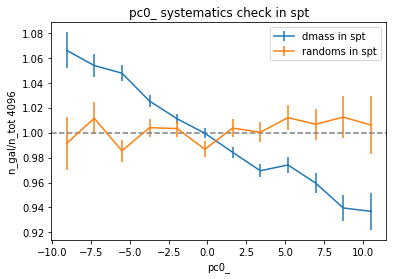

In [15]:
#plotting:

fig, ax = plt.subplots()
ax.errorbar( pcenter, norm_number_density, yerr=fracerr_norm, label = "dmass in spt")
ax.errorbar( pcenter, norm_number_density_ran, yerr=fracerr_ran_norm, label = "randoms in spt")
plt.legend()
xlabel = input_keyword
plt.xlabel(xlabel)
plt.ylabel("n_gal/n_tot 4096")
#plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
#plt.ylim(bottom=0.85)
plt.axhline(y=1, color='grey', linestyle='--')
#    plt.title(xlabel+' systematic check')
if sys_weights == True:
    plt.title(xlabel+' sys weights applied in spt')
    fig.savefig(xlabel+'sys_applied_spt.pdf')
else:
    plt.title(xlabel+' systematics check in spt')
    fig.savefig(xlabel+'sys_check_spt.pdf')   

In [16]:
outdir = '/fs/scratch/PCON0008/warner785/bwarner/'
os.makedirs(outdir, exist_ok=True)
esutil.io.write( outdir+xlabel+'norm_number_density_spt.fits', norm_number_density, overwrite=True)
esutil.io.write( outdir+xlabel+'fracerr_norm_spt.fits', fracerr_norm, overwrite=True)

In [18]:
# create plot with both trends 
spt = 'pc0_'
val = 'pca0_'

out = '/fs/scratch/PCON0008/warner785/bwarner/'
norm_number_density_spt = fitsio.read(out+spt+'norm_number_density_spt.fits')
fracerr_norm_spt = fitsio.read(out+spt+'fracerr_norm_spt.fits')

norm_number_density_val = fitsio.read(out+val+'norm_number_density_val.fits')
fracerr_norm_val = fitsio.read(out+val+'fracerr_norm_val.fits')

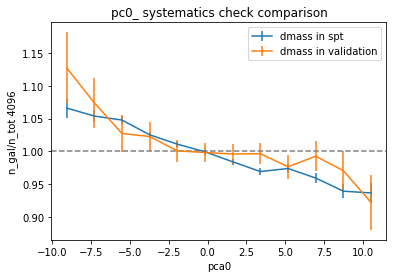

In [19]:
#plotting:

fig, ax = plt.subplots()
ax.errorbar( pcenter, norm_number_density_spt, yerr=fracerr_norm_spt, label = "dmass in spt")
ax.errorbar( pcenter, norm_number_density_val, yerr=fracerr_norm_val, label = "dmass in validation")
plt.legend()
xlabel = input_keyword
plt.xlabel('pca0')
plt.ylabel("n_gal/n_tot 4096")
#plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
#plt.ylim(bottom=0.85)
plt.axhline(y=1, color='grey', linestyle='--')
#    plt.title(xlabel+' systematic check')

plt.title(xlabel+' systematics check comparison')
fig.savefig(xlabel+'sys_check_compare.pdf')   